# Logistic regression


## Import the relevant libraries

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [2]:
raw_data = pd.read_csv('../../data/2.01. Admittance.csv')
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [3]:
# Replace all No entries with 0, and all Yes entries with 1
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


## Variables

독립변수와 종속변수를 확인한다.  
로지스틱 회귀는 기본적으로 종속변수가 이항인 모형이다.

In [4]:
# Create the dependent and independent variables
y = data['Admitted']
x1 = data['SAT']

## Let's plot the data

### Scatter plot

읽어들인 데이터의 산점도를 그려본다.

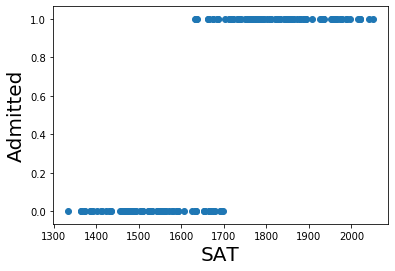

In [5]:
# Create a scatter plot of x1 (SAT, no constant) and y (Admitted)
plt.scatter(x1,y, color='C0')
# Don't forget to label your axes!
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

### Plot with a regression line

종속변수가 이항인 데이터에 대해 선형회귀 모형을 적용하여 확인해 보자.

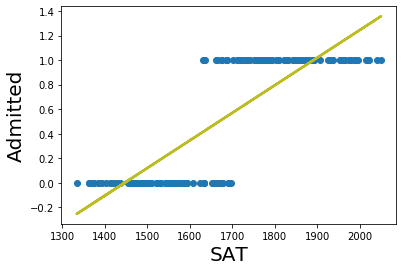

In [6]:
reg = LinearRegression()
X = x1.values.reshape(-1,1)
reg.fit(X,y)

# Create a scatter plot
plt.scatter(x1,y,color = 'C0')
# Plot the regression line. The coefficients are coming from results_lin.params
y_hat = reg.coef_*X + reg.intercept_
plt.plot(x1,y_hat,lw=2.5,color='C8')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

### Plot a logistic regression curve

In [7]:
model_sk = LogisticRegression(solver='liblinear',C=100).fit(X, y)

In [8]:
print(model_sk.intercept_, model_sk.coef_)

[-30.55733617] [[0.01842716]]


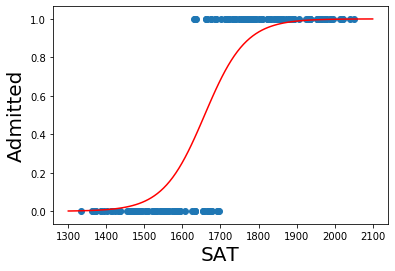

In [9]:
xx = np.linspace(1300, 2100,100)
mu = 1.0/(1 + np.exp(-model_sk.coef_[0][0]*xx - model_sk.intercept_[0]))

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(xx,mu,'r')
plt.show()

### 예측

새로운 값으로 예측을 수행한다.

In [10]:
model_sk.predict([[1520]])

array([0], dtype=int64)

In [11]:
model_sk.predict([[1980]])

array([1], dtype=int64)

### 모델의 분류 성능을 평가

confusion matrix는 데이터의 분류범주와 모형의 예측범주가 일치하는지 결과표로 나타낸다.

In [12]:
from sklearn.metrics import confusion_matrix

pred = model_sk.predict(X)

confusion = confusion_matrix(y, pred)

print("오차행렬: \n{}".format(confusion))

오차행렬: 
[[66  8]
 [ 4 90]]


### 분류기의 정확도 평가

In [13]:
model_sk.score(X, y)

0.9285714285714286

### 규제를 사용하여 과대 적합 방지
LogisticRegression의 파라미터 C는 규제의 정도를 제어한다.  
규제를 사용하여 모형의 복잡도를 조정할 수 있다. 규제는 모형의 훈련과정에서 가중치(계수)를 줄이는 역할을 한다. 

* 규제는 과대 적합을 방지
* 매개변수 C로 규제의 정도를 제어한다.
* C의 값을 감소하면 규제의 강도가 증가한다. 모형을 단순화하여 과대적합(overfitting)을 방지한다.

# Multi-Class Logistic Regression

`LogisticRegression()` 함수 옵션
* multi_class : {'ovr', 'multinomial'}, default: 'ovr'
* solver : {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, default: ‘liblinear’ 
    * 데이터 셋의 크기가 작으면 'liblinear' 가 유용하고 데이터 셋의 크기가 크면 'sag' 또는 'saga' 를 사용하는 것이 속도가 빠르다.
    * multiclass 의 경우 'newton-cg', 'sag', 'saga', 'lbfgs' 는 `multi_class = 'multinomial'`이 가능하고 'liblinear'의 경우에는 `multi_class = 'ovr'` 을 사용한다.



사이킷런에서 붓꽃 데이터셋을 적재한다. 세 번째 열은 꽃잎의 길이이고 네 번째 열은 꽃잎의 너비이다. 클래스는 이미 정수 레이블로 변환되어 있다. 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica 입니다.

In [14]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


### 70%는 훈련 데이터 30%는 테스트 데이터로 분할합니다:

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)
print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


### 표준화
특성을 표준화합니다

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

### 결정 경계 시각화

In [17]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

### 로지스틱 회귀모형

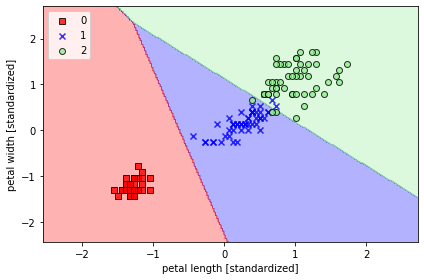

In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', multi_class='ovr', C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [19]:
# 로지스틱 회귀 모형으로 class 예측
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [20]:
# 로지스틱 회귀 모형에서 각 class에 대한 예측확률을 확인
np.round(lr.predict_proba(X_test_std[:3, :]),2)

array([[0.  , 0.14, 0.86],
       [0.83, 0.17, 0.  ],
       [0.85, 0.15, 0.  ]])